**Step 1: Importing The Libraries And Loading The Dataset**

In [3]:
import tensorflow as tf
(x_train, y_train),(x_test, y_test)=tf.keras.datasets.mnist.load_data()

#Displaying the shapes of trainig and testing data
print(x_train.shape)
print(x_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


Visualizing The Training Data Using Matplotlib

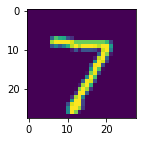

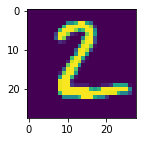

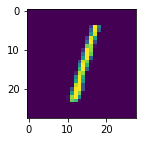

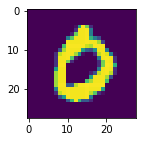

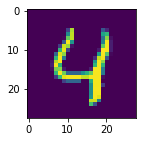

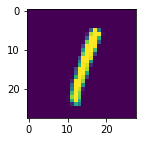

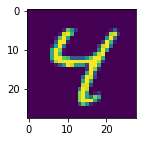

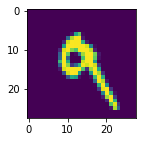

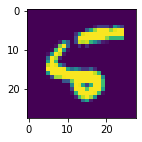

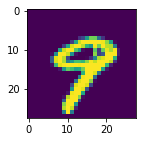

In [4]:
import matplotlib.pyplot as plt
for i in range(0,10):
  plt.subplots(figsize=(2,2))
  img=x_test[i]
  plt.imshow(img)
  

**Step 2: Pre-processing The Data**

In [5]:
#Reshaping the data
x_train =  x_train.reshape(x_train.shape[0],28,28,1)
x_test =  x_test.reshape(x_test.shape[0],28,28,1)
input_shape = (28,28,1)

#Normalizing the data
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train /= 255
x_test /=255

#Displaying shape after reshaping the data
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


**Step 3: Building The Convolutional Neural Network**  

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
model = Sequential()
model.add(Conv2D(28,kernel_size=(3,3),input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

**Step 4: Compiling And Training The Model**

In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train,y=y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 33s 17ms/step - loss: 0.2004 - accuracy: 0.9390
Epoch 2/5
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0805 - accuracy: 0.9757
Epoch 3/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0560 - accuracy: 0.9824
Epoch 4/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0446 - accuracy: 0.9854
Epoch 5/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0325 - accuracy: 0.9891


**Step 5: Evaluating The Model**

In [8]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0580 - accuracy: 0.9839


[0.057992663234472275, 0.9839000105857849]